<a href="https://colab.research.google.com/github/jobsiggang/2026_AI_Datascience/blob/main/2026_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B8%B0%EC%83%81%ED%8F%AC%ED%84%B8%EC%98%A8%EC%8A%B5%EB%8F%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install koreanize-matplotlib -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 58.5 MB/s eta 0:00:00


In [3]:
import koreanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기 및 초기 탐색

In [4]:
# 1. 기온 데이터 불러오기
df_temp = pd.read_csv(
    'https://raw.githubusercontent.com/jobsiggang/2026_AI_Datascience/refs/heads/main/ulsan_temp.csv', encoding='cp949')
df_temp.head()

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각,일교차
0,152,울산,2015-01-01,-2.7,0.4,15:06,-4.9,07:48,5.3
1,152,울산,2015-01-02,-1.0,2.9,13:09,-4.5,00:48,7.4
2,152,울산,2015-01-03,1.0,7.4,15:40,-5.2,06:12,12.6
3,152,울산,2015-01-04,4.4,12.6,14:55,-2.0,07:57,14.6
4,152,울산,2015-01-05,6.9,12.7,15:09,-1.0,05:10,13.7


In [5]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점번호     4014 non-null   int64  
 1   지점명      4014 non-null   object 
 2   일시       4014 non-null   object 
 3   평균기온(℃)  4014 non-null   float64
 4   최고기온(℃)  4014 non-null   float64
 5   	최고기온시각  4014 non-null   object 
 6   최저기온(℃)  4014 non-null   float64
 7   최저기온시각   4014 non-null   object 
 8   일교차      4014 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 282.4+ KB


In [6]:
# 2. 습도 데이터 불러오기
df_humi = pd.read_csv(
    'https://raw.githubusercontent.com/jobsiggang/2026_AI_Datascience/refs/heads/main/ulsan_humi.csv', encoding='cp949')
df_humi.head()

,지점번호,지점명,일시,평균습도(%rh),최저습도(%rh)
0,152,울산,2015-01-01,30.8,17.0
1,152,울산,2015-01-02,36.9,26.0
2,152,울산,2015-01-03,26.9,9.0
3,152,울산,2015-01-04,49.4,33.0
4,152,울산,2015-01-05,66.9,42.0


In [7]:
df_humi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   지점번호       4014 non-null   int64  
 1   지점명        4014 non-null   object 
 2   일시         4014 non-null   object 
 3   평균습도(%rh)  4014 non-null   float64
 4   최저습도(%rh)  4014 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 156.9+ KB


## 데이터 전처리 및 병합


In [8]:
# 3. '일시' 컬럼을 datetime 타입으로 변환
df_humi['일시'] = pd.to_datetime(df_humi['일시'])
df_temp['일시'] = pd.to_datetime(df_temp['일시'])

In [9]:
df_merge = pd.merge(df_temp, df_humi, on=["지점번호", "지점명", "일시"], how="inner")
# df_merge = pd.merge(df_temp, df_humi, on=[ "일시"], how="inner") #이 코드로 했을때 문제점을 비교해 보세요.
df_merge.head()

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각,일교차,평균습도(%rh),최저습도(%rh)
0,152,울산,2015-01-01,-2.7,0.4,15:06,-4.9,07:48,5.3,30.8,17.0
1,152,울산,2015-01-02,-1.0,2.9,13:09,-4.5,00:48,7.4,36.9,26.0
2,152,울산,2015-01-03,1.0,7.4,15:40,-5.2,06:12,12.6,26.9,9.0
3,152,울산,2015-01-04,4.4,12.6,14:55,-2.0,07:57,14.6,49.4,33.0
4,152,울산,2015-01-05,6.9,12.7,15:09,-1.0,05:10,13.7,66.9,42.0


In [20]:
#
df_merge["연도"] = df_merge["일시"].dt.year
df_merge["월"] = df_merge["일시"].dt.month

In [21]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   지점번호       4014 non-null   int64         
 1   지점명        4014 non-null   object        
 2   일시         4014 non-null   datetime64[ns]
 3   평균기온(℃)    4014 non-null   float64       
 4   최고기온(℃)    4014 non-null   float64       
 5   	최고기온시각    4014 non-null   object        
 6   최저기온(℃)    4014 non-null   float64       
 7   최저기온시각     4014 non-null   object        
 8   일교차        4014 non-null   float64       
 9   평균습도(%rh)  4014 non-null   float64       
 10  최저습도(%rh)  4014 non-null   float64       
 11  연도         4014 non-null   int32         
 12  월          4014 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(2), int64(1), object(3)
memory usage: 376.4+ KB


In [22]:
df_merge.columns

Index(['지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '\t최고기온시각', '최저기온(℃)',
       '최저기온시각', '일교차', '평균습도(%rh)', '최저습도(%rh)', '연도', '월'],
      dtype='object')

## 기초 통계 분석 및 조건부 데이터 추출

In [11]:
df_merge[["평균기온(℃)", "최고기온(℃)", "평균습도(%rh)"]].mean()
df_merge.loc[df_merge["일교차"].idxmax()]

,1930
지점번호,152
지점명,울산
일시,2020-04-14 00:00:00
평균기온(℃),14.4
최고기온(℃),23.2
\t최고기온시각,16:43
최저기온(℃),4.1
최저기온시각,05:36
일교차,19.1
평균습도(%rh),36.0


In [12]:
condition = (df_merge["평균기온(℃)"] >= 5) & (df_merge["평균습도(%rh)"] >= 50)
df_merge[condition]

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각,일교차,평균습도(%rh),최저습도(%rh)
4,152,울산,2015-01-05,6.9,12.7,15:09,-1.0,05:10,13.7,66.9,42.0
14,152,울산,2015-01-15,6.5,9.5,10:21,2.5,23:30,7.0,76.3,58.0
20,152,울산,2015-01-21,6.2,10.0,13:23,3.2,05:33,6.8,75.8,54.0
21,152,울산,2015-01-22,5.5,7.5,14:37,3.3,23:56,4.2,73.5,56.0
24,152,울산,2015-01-25,6.3,11.0,16:25,0.0,04:54,11.0,68.9,51.0
...,...,...,...,...,...,...,...,...,...,...,...
4003,152,울산,2025-12-17,7.8,11.7,14:08,3.7,23:17,8.0,56.1,30.0
4005,152,울산,2025-12-19,10.3,16.8,13:24,2.7,06:11,14.1,74.9,51.0
4006,152,울산,2025-12-20,13.2,18.5,13:50,7.4,07:20,11.1,78.9,62.0
4009,152,울산,2025-12-23,7.1,12.0,14:59,1.2,06:28,10.8,71.3,54.0


## 월별 평균 기온 및 평균 습도 결과 확인


In [27]:
df_merge['일시'] = pd.to_datetime(df_merge['일시'])
df_merge['월'] = df_merge['일시'].dt.month

display(df_merge.groupby('월')[['평균기온(℃)', '평균습도(%rh)']].mean())

,평균기온(℃),평균습도(%rh)
월,,
1,2.804399,48.760117
2,4.536977,50.037942
3,9.520235,58.090323
4,14.018788,61.882727
5,18.545161,64.270968
6,21.993333,76.140606
7,25.654545,82.386804
8,26.694135,80.311730
9,22.165758,80.797273


위 결과를 통해 여름철(7~8월)에 기온과 습도가 가장 높고, 겨울철(12~2월)에 가장 낮은 전형적인 계절적 패턴을 보임을 알 수 있습니다.

## 다양한 시각화를 통한 데이터 이해


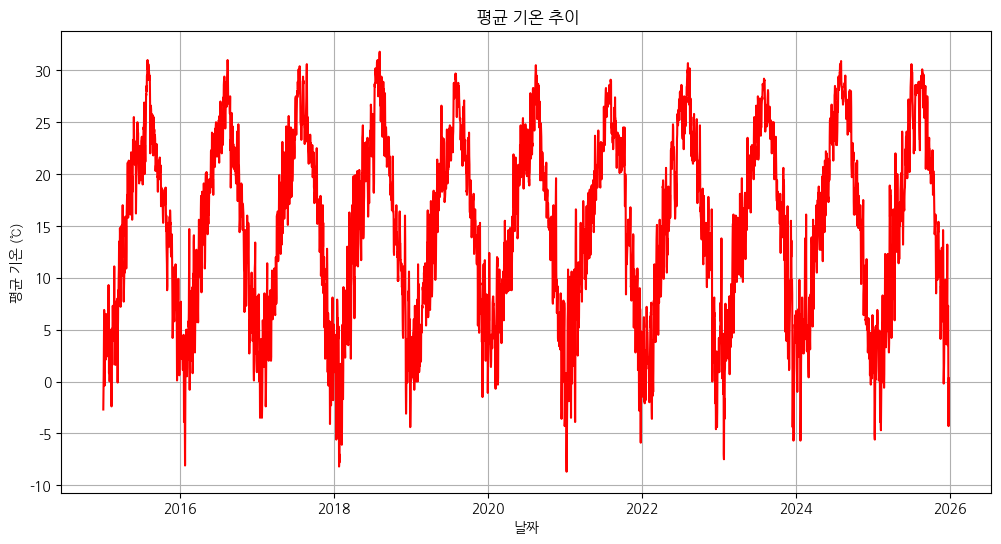

In [27]:
# 평균 기온 추이 선 그래프 생성
plt.figure(figsize=(12, 6))
plt.plot(df_merge['일시'], df_merge['평균기온(℃)'], color='red')
plt.title(' 평균 기온 추이')
plt.xlabel('날짜')
plt.ylabel('평균 기온 (℃)')
plt.grid(True)
plt.show()

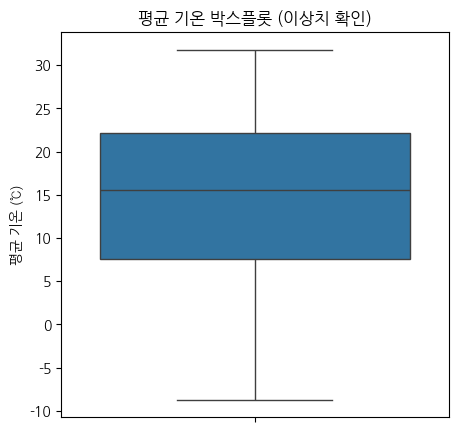

In [23]:
plt.figure(figsize=(5, 5))
sns.boxplot(y=df_merge['평균기온(℃)'].dropna())
plt.title('평균 기온 박스플롯 (이상치 확인)')
plt.ylabel('평균 기온 (℃)')
plt.show()

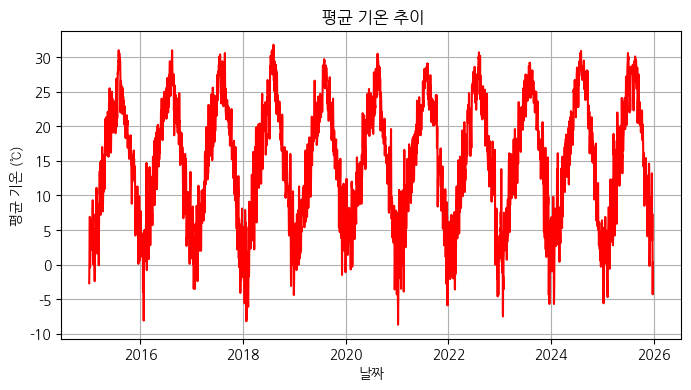

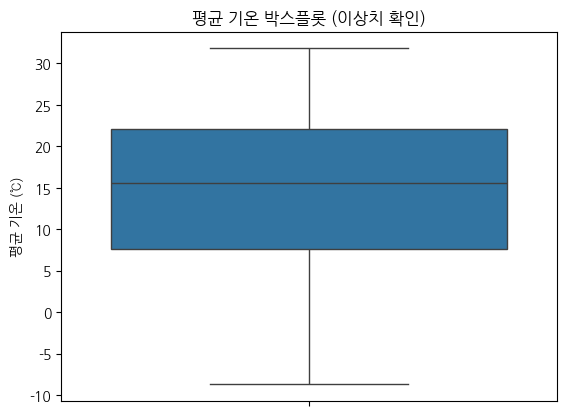

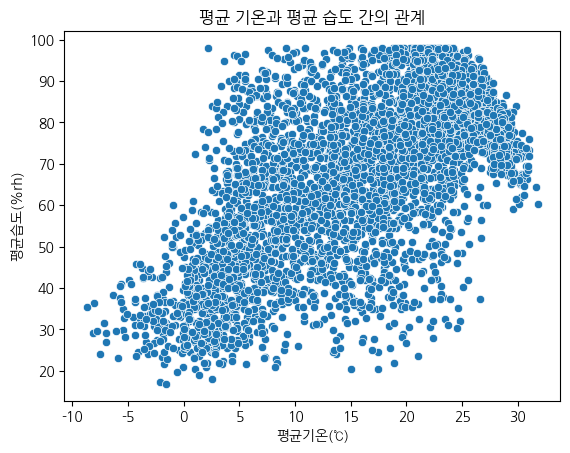

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.plot(df_merge['일시'], df_merge['평균기온(℃)'], color='red')
plt.title(' 평균 기온 추이')
plt.xlabel('날짜')
plt.ylabel('평균 기온 (℃)')
plt.grid(True)
plt.show()

sns.boxplot(y=df_merge['평균기온(℃)'].dropna())
plt.title('평균 기온 박스플롯 (이상치 확인)')
plt.ylabel('평균 기온 (℃)')
plt.show()

sns.scatterplot(x="평균기온(℃)", y="평균습도(%rh)", data=df_merge)
plt.title('평균 기온과 평균 습도 간의 관계')
plt.show()

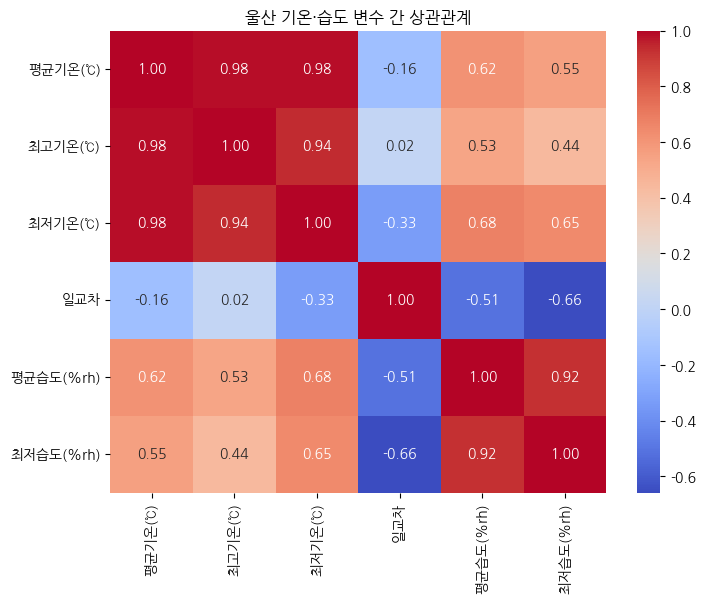

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 컬럼만 선택
cols = ["평균기온(℃)", "최고기온(℃)", "최저기온(℃)", "일교차",
        "평균습도(%rh)", "최저습도(%rh)"]

corr = df_merge[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("울산 기온·습도 변수 간 상관관계")
plt.show()

In [25]:
df_merge["일시"] = pd.to_datetime(df_merge["일시"])
df_merge["월"] = df_merge["일시"].dt.month

df_merge.groupby("월")[["평균기온(℃)", "평균습도(%rh)"]].mean()

,평균기온(℃),평균습도(%rh)
월,,
1,2.804399,48.760117
2,4.536977,50.037942
3,9.520235,58.090323
4,14.018788,61.882727
5,18.545161,64.270968
6,21.993333,76.140606
7,25.654545,82.386804
8,26.694135,80.311730
9,22.165758,80.797273


## 확률분포를 이용한 통계적 추정

표본 수: 31
평균 기온: 9.21℃
표준편차: 5.03℃
95% 신뢰구간: (7.44℃, 10.98℃)


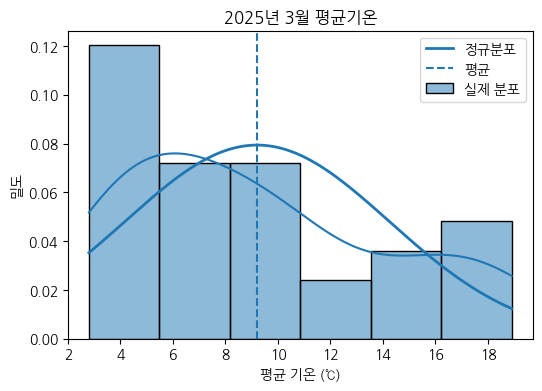

In [25]:
# 1. 날짜 처리
df_merge['일시'] = pd.to_datetime(df_merge['일시'])

# 2. 2025년 3월 데이터 추출
march_2025 = df_merge[
    (df_merge['일시'].dt.year == 2025) &
    (df_merge['일시'].dt.month == 3)
]['평균기온(℃)'].dropna()

# 3. 기술통계량 계산
mu = march_2025.mean()      # 평균
sigma = march_2025.std()    # 표준편차
n = len(march_2025)         # 표본 수

print(f"표본 수: {n}")
print(f"평균 기온: {mu:.2f}℃")
print(f"표준편차: {sigma:.2f}℃")

# 4. 평균에 대한 95% 신뢰구간 계산
confidence_level = 0.95
ci_low, ci_high = stats.norm.interval(
    confidence_level,
    loc=mu,
    scale=sigma / np.sqrt(n)
)

print(f"95% 신뢰구간: ({ci_low:.2f}℃, {ci_high:.2f}℃)")

# 5. 히스토그램 + KDE + 정규분포 곡선
plt.figure(figsize=(6, 4))
sns.histplot(march_2025, stat='density', kde=True, label='실제 분포')

x = np.linspace(march_2025.min(), march_2025.max(), 200)
y = stats.norm.pdf(x, mu, sigma)

plt.plot(x, y, linewidth=2, label='정규분포')

# 평균선 표시
plt.axvline(mu, linestyle='--', label='평균')

plt.title('2025년 3월 평균기온 분포')
plt.xlabel('평균 기온 (℃)')
plt.ylabel('밀도')
plt.legend()
plt.show()


표본 수 (모든 해 3월): 341
평균 기온: 9.52℃
표준편차: 3.65℃
95% 신뢰구간: (9.13℃, 9.91℃)


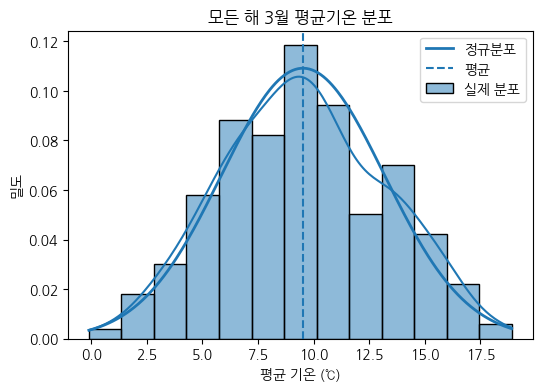

In [26]:
# =========================
# 1. 모든 해의 3월 데이터 추출
# =========================

# 일시 컬럼이 datetime이 아닐 경우 변환
df_merge['일시'] = pd.to_datetime(df_merge['일시'])

# 월(month)이 3인 데이터만 선택 → 모든 해의 3월
march_all = df_merge[df_merge['일시'].dt.month == 3]['평균기온(℃)'].dropna()

# =========================
# 2. 기본 통계량 계산
# =========================

# 표본 평균 (모평균 추정값)
mu = march_all.mean()

# 표본 표준편차
sigma = march_all.std()

# 표본 수
n = len(march_all)

print(f"표본 수 (모든 해 3월): {n}")
print(f"평균 기온: {mu:.2f}℃")
print(f"표준편차: {sigma:.2f}℃")

# =========================
# 3. 평균에 대한 95% 신뢰구간
# =========================
# 표본평균의 분포: N(mu, sigma / sqrt(n))

confidence_level = 0.95

ci_low, ci_high = stats.norm.interval(
    confidence_level,
    loc=mu,
    scale=sigma / np.sqrt(n)
)

print(f"95% 신뢰구간: ({ci_low:.2f}℃, {ci_high:.2f}℃)")

# =========================
# 4. 히스토그램 + 정규분포 시각화
# =========================
plt.figure(figsize=(6, 4))

# 실제 분포 (모든 해 3월)
sns.histplot(
    march_all,
    stat='density',
    kde=True,
    label='실제 분포'
)

# 정규분포 곡선
x = np.linspace(march_all.min(), march_all.max(), 300)
y = stats.norm.pdf(x, mu, sigma)

plt.plot(x, y, linewidth=2, label='정규분포')

# 평균선
plt.axvline(mu, linestyle='--', label='평균')

# =========================
# 5. 그래프 설정
# =========================
plt.title('모든 해 3월 평균기온 분포')
plt.xlabel('평균 기온 (℃)')
plt.ylabel('밀도')
plt.legend()
plt.show()
